![Logo TUBAF](https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png)

In our teaching we employ interactive Jupyter notebooks in order to allow our students to play with the concepts and hence familiarize themselves more quickly with the new knowledge. Below, we give selected examples of such scripts without much explanation. The remainder can be found in the respective course materials.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics

# Beschreibung von Kornverteilungskurven

In [1]:
#HIDDEN
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact
from ipywidgets import interaction
import scipy as sp
from scipy import interpolate
import pandas as pd
import seaborn as sns
from matplotlib.colors import SymLogNorm

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/kornverteilungskurve_plots.ipynb

Im Zuge der Bestimmung einer Sieblinie werden Siebrückstände $m_i$ ermittelt. Die einzelnen zu den Siebdurchmessern $d_i$ gehörigen Siebrückstände $m_i$ können nun auf die Gesamtmasse $m_\text{d} = \sum m_i$ (Annahme vernachlässigbarer Siebverluste) bezogen werden, womit die Masseanteile

$$
    x_i = \frac{m_i}{m_\text{d}}
$$

ermittelt werden. Diese werden typischerweise in einer Summenkurve

$$
    F(d_i) = \sum \limits_{k=1}^i x_i
$$

aufgetragen. Dabei wird aufgrund der über Größenordnungen verteilten Korndurchmesser eine halblogarithmische Darstellung gewählt (siehe folgende Abbildung, rechts). Feinanteile, die nicht durch Siebung näher untersucht werden, sind nicht mit dargestellt. In der linken Abbildung sind die Masseanteile selbst und das zugehörige Histogramm der Masseverteilung dargestellt.

Mithilfe der Körnungslinie bzw. Kornverteilungskurve können die dominierenden Bestandteile (T, U, S, G) ermittelt werden. Des weiteren können die Ungleichförmigkeitszahl

$$
    C_U = \frac{d_{60}}{d_{10}}
$$

und die Krümmungszahl

$$
    C_C = \frac{d_{30}^2}{d_{10}\ d_{60}}
$$

abgeleitet werden. 

Die folgenden Siebrückstände seien gegeben:

In [2]:
#HIDDEN
Siebdurchmesser = np.array([63,31.5,16,8,4,2,1,0.5,0.25,0.125,0.063,0.001])#letzter: Rückstand in Null
Startwerte = np.array([0,0,842.4,1059.8,1222.9,788.0,706.6,407.6,210.0,195.7,0,0])

Massen = [widgets.FloatText(value=Startwerte[i],description=str(Siebdurchmesser[i])+' mm') for i in range(len(Siebdurchmesser))]
Eingabe=widgets.VBox(Massen)
Eingabe

In [3]:
#HIDDEN
interact(plot_KVK_glob, Neuauswertung=False);

interactive(children=(Checkbox(value=False, description='Neuauswertung'), Output()), _dom_classes=('widget-int…

Damit lassen sich die Masseanteile der einzelnen Kornfraktionen ablesen:

In [4]:
#HIDDEN
interact(Anteilsbestimmung_glob, Neuauswertung=False);

interactive(children=(Checkbox(value=False, description='Neuauswertung'), Output()), _dom_classes=('widget-int…

# Aktive und passive Erddrücke aus dem Mohr'schen Spannungskreis

In [5]:
#HIDDEN
from matplotlib import patches

#Some plot settings
%run plot_functions/Mohrs_circle_K0_plots.ipynb

## Ebene Betrachtungen

Die folgenden Betrachtungen liegen in der $x$-$z$ Ebene und gelten für ebene Spannungszustände und ebene Verzerrungszustände mit $\sigma_{yy} = \sigma_2$.

Zusätzlich legen wir $\sigma_{zz}$ beliebig, aber ohne Einschränkung der Allgemeingültigkeit, zu 200 kPa fest.

Im kohäsionslosen Boden ergibt sich aus dem Mohr-Coulomb'schen Bruchkriterium:

$$
\displaystyle\frac{1-\sin\phi}{1+\sin \phi} \sigma_{zz} < \sigma_{xx} < \frac{1+\sin\phi}{1-\sin \phi} \sigma_{zz}
$$

mit 

\begin{align*}
    K_{\text{a}} &= \displaystyle\frac{1-\sin\phi}{1+\sin \phi}
    \\\\
    K_{\text{p}} &= \displaystyle \frac{1+\sin\phi}{1-\sin \phi}
\end{align*}

In kohäsiven Böden ergibt sich in analoger Betrachtungsweise der von den aktiven und passiven Grenzzuständen begrenzte Horizontalspannungsbereich

$$
K_{\text{a}} \sigma_{zz} - 2c \sqrt{K_{\text{a}}} < \sigma_{xx} < K_{\text{p}} \sigma_{zz} + 2c \sqrt{K_{\text{p}}}
$$

In [6]:
#HIDDEN
s_zz = 200.

In [7]:
#HIDDEN
plot_interactive_K0c()

interactive(children=(FloatSlider(value=20.0, description='$\\phi$ / °', max=30.0, min=10.0, step=5.0), FloatS…

## Spannungszustände und Schnittebenen im Mohr'schen Spannungskreis

In diesem Beispiel wollen wir einen gegebenen Spannungszustand mitsamt seiner Orientierung sowie den Bruchzustand in den Spannungskreis integrieren. Außerdem wollen wir die Funktion des Pols für die Bestimmung der Schnittebenen einzelner Komponenten des Spannungstensors demonstrieren.

Der Pol ist über den angegebenen Spannungszustand definiert. Damit sind alle angegebenen Ebenen in Bezug auf das $x-z$ Koordinatensystem zu verstehen. Der eingetragene grüne Zentriwinkel $2\theta^*$ hingegen beschreibt die Orientierung der Bruchebenen gegenüber den Hauptspannungsrichtungen (nur eine gezeichnet).

In [8]:
#HIDDEN
%run plot_functions/Mohrs_circle_plots.ipynb
plot_interactive_failure()

interactive(children=(BoundedFloatText(value=30.0, description='$\\varphi$ / °'), FloatText(value=200.0, descr…

## Aktiver Erddruck mit Linienbruch

In [9]:
#HIDDEN
%run plot_functions/earth_pressure_plots.ipynb
plot_interactive_earth_pressure()

interactive(children=(IntSlider(value=10, description='$c$ / kN m$^{-2}$:', max=50, step=5), IntSlider(value=3…

## Tasks

* Compare the numbers you get to results obtained from the analytical expressions you find in the current norm.
* Investigate the influence of the different parameters.
* What happens at very high cohesion values? What does this mean?
* How high can a cohesive vertical slope be roughly? Select suitable parameters to answer this question.

![Erddruck.png](https://raw.githubusercontent.com/nagelt/Teaching_Scripts/master/Images/Erddruck.png)

# Böschungsbruchberechnungen am Gleitkreis mit lamellenfreiem Verfahren

In [10]:
#HIDDEN
#Slope geometry
H = 4.5
beta = np.arctan(4.5/9)

#Variation of slip circle centers
Mx = np.linspace(-H,H/np.tan(beta),30)
Mz = np.linspace(0.8*H,4*H,20)

#Soil properties
c = 5.
phi = np.deg2rad(20)
gamma = 16

#Distributed load (magnitude and range from shoulder)
p_load = 30.
xSV = np.array([0.5,3.5])

In [11]:
#HIDDEN
%run plot_functions/slope_stability_plots.ipynb

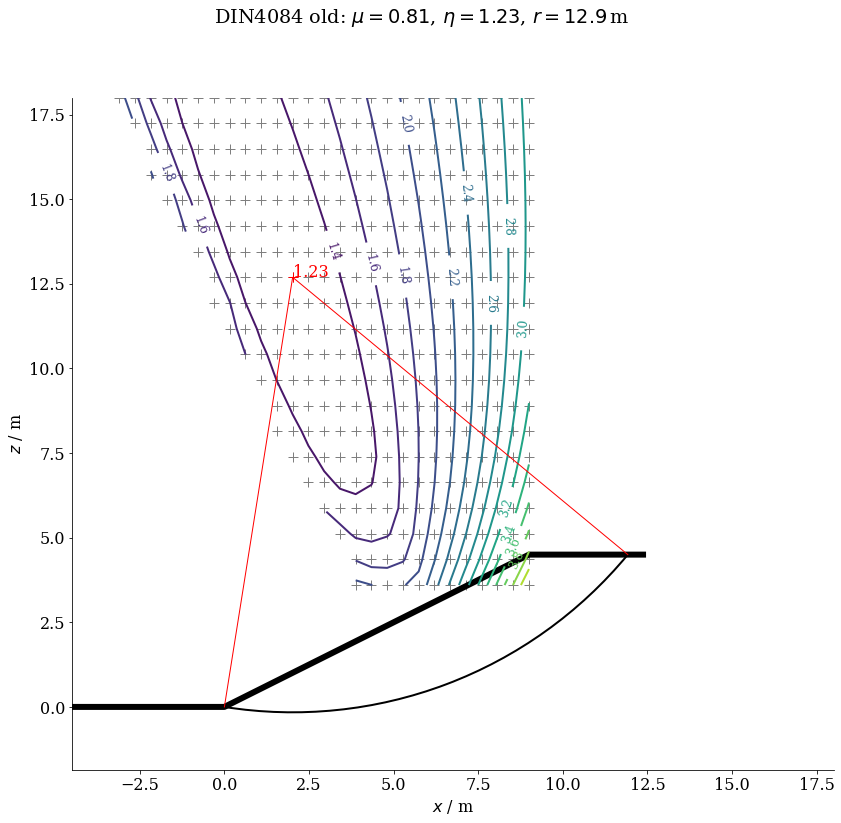

In [12]:
#HIDDEN
run_analysis()

## Halbraumspannungen infolge von Linienlasten $\vec{f}$

In größeren Tiefen verschmieren die Effekte der Einzellasten zugunsten der Gesamtbelastung. Die Spannungszwiebeln überlagern sich. Wir können so auch den Übergang zur Linienlast (hier entlang x) simulieren. Dazu definieren wir im Interval $x\in[-4,4]\,$m aller 0.5 m eine vertikale Punktlast von 50 kN und stellen die Vertikalspannungsverteilung dar.

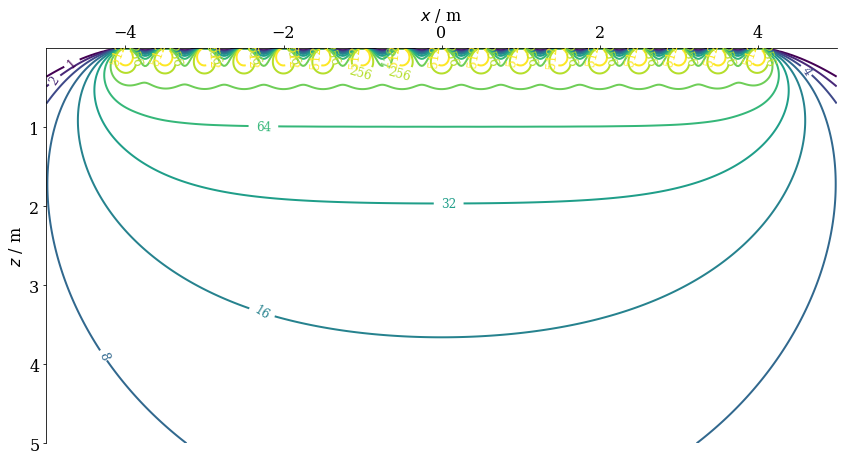

In [13]:
#HIDDEN
%run plot_functions/stresses_under_loads_plots.ipynb
plot_isobars_zz_Boussinesq_multi()

Wir betrachten nun "Kräfte pro laufendem Meter", sogennannte Linienlasten. Wir legen dafür das Koordinatensystem derart, dass o.E.d.A. die $y$-Achse in Richtung der unendlich ausgedehnten Linienlast zeige. Dementsprechend sei $x$ die zu $y$ originale oberflächenparallele Koordinate und $z$ die Vertikalkoordinate, die die Tiefe misst. Die Herleitung nach Superpositionsprinzip wurde in den ergänzenden Vorlesungsunterlagen dargestellt. Durch die unendliche Ausdehnung und die damit verbundene Symmetrie verschwinden die Schubspannungen $\tau_{y\bullet}$ und die Lösung beschränkt sich auf die verbliebenen Spannungskoordinaten.

Die folgende Lösung nach *Boussinesq* gilt für die Koordinaten des Cauchy'schen Spannungstensors unter einer vertikalen Linienlast $f_z$:

\begin{align}
    \Delta \sigma_{xx} &= \frac{2}{\pi} \frac{f_z}{R_\text{L}} \frac{x^2z}{R_\text{L}^3}
    \\
    \Delta \sigma_{yy} &= \frac{2}{\pi} \frac{f_z}{R_\text{L}} \nu \frac{z}{R_\text{L}}
    \\
    \Delta \sigma_{zz} &= \frac{2}{\pi} \frac{f_z}{R_\text{L}} \left( \frac{z}{R_\text{L}} \right)^3
    \\
    \Delta \sigma_{xz} &= \frac{2}{\pi} \frac{f_z}{R_\text{L}} \frac{xz^2}{R_\text{L}^3}
    \\
    &\text{mit } R_\text{L} = \sqrt{x^2 + z^2}
\end{align}

In [14]:
#HIDDEN
interactive_line_load()

interactive(children=(BoundedFloatText(value=100.0, description='$|\\vec{f}|$ / kN m$^{-1}$', style=Descriptio…

## Setzungsberechnungen

Direkte und indirekte Verfahren nach DIN 4019; Verdrehung von Fundamenten; Spannungstrapezverfahren, etc.

In [15]:
#HIDDEN
%run plot_functions/settlements_plots.ipynb
%run plot_functions/stresses_steinbrenner_plots.ipynb

gamma = 16.
q0 = 300.
ts = 25.
a = 6.
b = 4.

E_s = lambda sig, Eref, sigref, om: Eref * np.power(sig/sigref,om) #kPa
eps = lambda sig, Eref, sigref, om: sigref*np.log(sig/sigref)/Eref if om == 1 else sigref/((1-om)*Eref) * ( np.power(sig/sigref,1-om) -1 )
loopifier = lambda w: w*(1-w) * 0.005

In [16]:
#HIDDEN
#HIDDEN
#global variables
#%run plot_functions/settlements_plots.ipynb
html = True
items = []
if html:
    n_layers = widgets.BoundedIntText(value=5,min=5,max=5,description='$n_\\mathrm{layers}$')
    print('In the HTML version you can only work with 5 layers.')
else:
    n_layers = widgets.BoundedIntText(value=5,min=1,max=10,description='$n_\\mathrm{layers}$')

if html:
    items = [widgets.BoundedFloatText(description='$q_0$ / kPa',value=300,min=0,max=2000),
             widgets.BoundedFloatText(description='$d$ / m',value=2,min=0,max=100),
             widgets.BoundedFloatText(description='$\\gamma_d$ / kN m$^{-3}$',value=18,min=0,max=30),
             widgets.BoundedFloatText(description='$\\nu$',value=0,min=0,max=0.499),
             widgets.BoundedFloatText(description='$a$ / m',value=2,min=0.01,max=50),
             widgets.BoundedFloatText(description='$b$ / m',value=2,min=0.01,max=50)]
    for i in range(n_layers.value):
        items.append(widgets.BoundedFloatText(description='$z_{%i}$ / m' %(i+1),value=1+i*2,min=0,max=200))
        items.append(widgets.BoundedFloatText(description='$E^*_{%i}$ / MPa' %(i+1),value=(i+1)*10,min=0.01,max=10000))
        items.append(widgets.BoundedFloatText(description='$\gamma_{%i}$ / kN m$^{-3}$' %(i+1),value=18-i,min=1,max=35))
    w = widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(3,350px)"))
else:
    w = interact(run_layers, update_layers=True);

display(w);

In the HTML version you can only work with 5 layers.


GridBox(children=(BoundedFloatText(value=300.0, description='$q_0$ / kPa', max=2000.0), BoundedFloatText(value…

In [17]:
interact(run_analysis, update_analysis=True);

interactive(children=(Checkbox(value=True, description='update_analysis'), Output()), _dom_classes=('widget-in…

In [18]:
#HIDDEN
#%run plot_functions/settlements_plots.ipynb
interactive_indirect_layers()

interactive(children=(IntSlider(value=3, description='$n$', max=15, min=1), FloatSlider(value=0.0, description…

In [19]:
#HIDDEN
interactive_kern_compound()

interactive(children=(FloatSlider(value=0.2, description='$e_x$ / $a$', max=0.45, min=-0.45, step=0.01), Float…